# Loss Functions

In this exercise, you will compare the effects of Loss functions on a linear regression model.

👇 Import the data from the attached csv file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Average Temperature
0,0.98,514.5,294.0,110.25,7.0,0.0,18.44
1,0.98,514.5,294.0,110.25,7.0,0.0,18.44
2,0.98,514.5,294.0,110.25,7.0,0.0,18.44
3,0.98,514.5,294.0,110.25,7.0,0.0,18.44
4,0.90,563.5,318.5,122.50,7.0,0.0,24.56


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Relative Compactness  768 non-null    float64
 1   Surface Area          768 non-null    float64
 2   Wall Area             768 non-null    float64
 3   Roof Area             768 non-null    float64
 4   Overall Height        768 non-null    float64
 5   Glazing Area          768 non-null    float64
 6   Average Temperature   768 non-null    float64
dtypes: float64(7)
memory usage: 42.1 KB


In [4]:
data.drop_duplicates()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Average Temperature
0,0.98,514.5,294.0,110.25,7.0,0.0,18.440
4,0.90,563.5,318.5,122.50,7.0,0.0,24.560
5,0.90,563.5,318.5,122.50,7.0,0.0,23.420
6,0.90,563.5,318.5,122.50,7.0,0.0,22.935
7,0.90,563.5,318.5,122.50,7.0,0.0,24.640
...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4,19.640
764,0.62,808.5,367.5,220.50,3.5,0.4,16.710
765,0.62,808.5,367.5,220.50,3.5,0.4,16.775
766,0.62,808.5,367.5,220.50,3.5,0.4,16.545


In [5]:
data.reset_index(drop=True)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Average Temperature
0,0.98,514.5,294.0,110.25,7.0,0.0,18.440
1,0.98,514.5,294.0,110.25,7.0,0.0,18.440
2,0.98,514.5,294.0,110.25,7.0,0.0,18.440
3,0.98,514.5,294.0,110.25,7.0,0.0,18.440
4,0.90,563.5,318.5,122.50,7.0,0.0,24.560
...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4,19.640
764,0.62,808.5,367.5,220.50,3.5,0.4,16.710
765,0.62,808.5,367.5,220.50,3.5,0.4,16.775
766,0.62,808.5,367.5,220.50,3.5,0.4,16.545


🎯 Your task is to predict the average temperature inside a greenhouse based on its design. Your temperature predictions will help you select the appropriate greenhouse design for each plant, based on their climatic needs. 

🌿 You know that plants can handle small temperature variations, but are exponentially more sensitive as the temperature variations increase. 

## 1. Theory 

❓ Theoretically, which Loss function would you train your model on to limit the risk of killing plants?

<details>
<summary> 🆘 Answer </summary>
    
By theory, you would use a Mean Square Error (MSE) Loss function. It would penalize outlier predictions and prevent your model from committing large errors. This would ensure smaller temperature variations and a lower risk for plants.

</details>

> YOUR ANSWER HERE

## 2. Application

### 2.1 Preprocessing

👇 Scale the features

<AxesSubplot:>

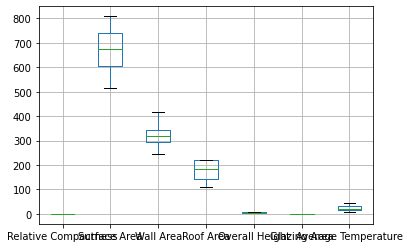

In [6]:
data.boxplot()

array([[<AxesSubplot:title={'center':'Relative Compactness'}>,
        <AxesSubplot:title={'center':'Surface Area'}>,
        <AxesSubplot:title={'center':'Wall Area'}>],
       [<AxesSubplot:title={'center':'Roof Area'}>,
        <AxesSubplot:title={'center':'Overall Height'}>,
        <AxesSubplot:title={'center':'Glazing Area'}>],
       [<AxesSubplot:title={'center':'Average Temperature'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

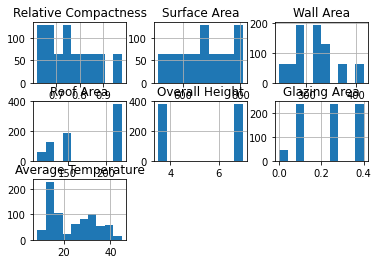

In [7]:
data.hist()

In [8]:
features = data.drop(columns=['Average Temperature'])
target = data['Average Temperature']

In [9]:
target.head()

0    18.44
1    18.44
2    18.44
3    18.44
4    24.56
Name: Average Temperature, dtype: float64

In [10]:
features 

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area
0,0.98,514.5,294.0,110.25,7.0,0.0
1,0.98,514.5,294.0,110.25,7.0,0.0
2,0.98,514.5,294.0,110.25,7.0,0.0
3,0.98,514.5,294.0,110.25,7.0,0.0
4,0.90,563.5,318.5,122.50,7.0,0.0
...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4
764,0.62,808.5,367.5,220.50,3.5,0.4
765,0.62,808.5,367.5,220.50,3.5,0.4
766,0.62,808.5,367.5,220.50,3.5,0.4


In [11]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)
pd.DataFrame(scaled_features).head(5)

,0,1,2,3,4,5
0,1.559322,-1.181818,-0.5,-0.923077,0.5,-0.833333
1,1.559322,-1.181818,-0.5,-0.923077,0.5,-0.833333
2,1.559322,-1.181818,-0.5,-0.923077,0.5,-0.833333
3,1.559322,-1.181818,-0.5,-0.923077,0.5,-0.833333
4,1.016949,-0.818182,0.0,-0.769231,0.5,-0.833333


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>]], dtype=object)

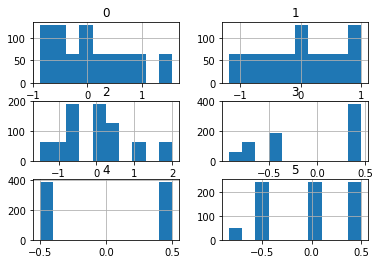

In [12]:
pd.DataFrame(scaled_features).hist()

In [13]:
features = pd.DataFrame(data=scaled_features, columns=features.columns)
features.head(3)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area
0,1.559322,-1.181818,-0.5,-0.923077,0.5,-0.833333
1,1.559322,-1.181818,-0.5,-0.923077,0.5,-0.833333
2,1.559322,-1.181818,-0.5,-0.923077,0.5,-0.833333


### 2.2 Modelling

In this section, you are going to verify the theory by evaluating models optimized on different Loss functions.

### Least Squares (MSE) Loss

👇 **10-Fold Cross-validate** a Linear Regression model optimized by **Stochastic Gradient Descent** (SGD) on a **Least Squares Loss** (MSE)



In [14]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate

model = SGDRegressor(loss='squared_loss')

In [15]:
cv_results = cross_validate(model, features, target, cv=10, scoring=['r2','max_error'])
cv_results

{'fit_time': array([0.027385  , 0.02294087, 0.03987694, 0.04408789, 0.04109907,
        0.06131482, 0.05286813, 0.04430389, 0.04487896, 0.02047682]),
 'score_time': array([0.00332594, 0.00394106, 0.00973392, 0.03321218, 0.02244401,
        0.01160717, 0.00433183, 0.01477098, 0.00847101, 0.00669384]),
 'test_r2': array([0.78365296, 0.90694087, 0.89397574, 0.88150407, 0.93145679,
        0.89648666, 0.92826449, 0.91594553, 0.89641962, 0.93925652]),
 'test_max_error': array([-9.52701974, -8.9899323 , -9.14117201, -9.55554084, -9.21333601,
        -8.97375505, -8.88961156, -9.15532446, -8.69889524, -7.97010552])}

👇 Compute 
- the mean cross validated R2 score `r2`
- the single biggest prediction error in °C of all your folds `max_error`?

(Tips: `max_error` is an accepted scoring metrics in sklearn)

In [16]:
r2 = cv_results['test_r2'].mean()
r2

0.8973903247696576

In [ ]:
max_error = cv_results['test_max_error'].mean()
max_error

-9.011469273057982

### Mean Absolute Error (MAE) Loss

What if we optimize our model on the MAE instead?

👇 **10-Fold Cross-validate** a Linear Regression model optimized by **Stochastic Gradient Descent** (SGD) on a **MAE** Loss

<details>
<summary>💡 Hints</summary>

- MAE loss cannot be directly specified in `SGDRegressor`. It must be engineered by adjusting the right parameters

</details>

In [ ]:
model_mae = SGDRegressor(loss='squared_loss', penalty='l1')
cv_results = cross_validate(model_mae, features, target, cv=10, scoring=['r2','max_error'])
cv_results

👇 Compute 
- the mean cross validated R2 score `r2_mae`
- the single biggest prediction error of all your folds `max_error_mae`?

In [ ]:
r2_mae, max_error_mae = cv_results['test_r2'].mean(), cv_results['test_max_error'].mean()
r2_mae, max_error_mae

## 3. Conclusion

❓Which of the models you evaluated seems the most appropriate for your task?

<details>
<summary> 🆘Answer </summary>
    
Although mean cross-validated r2 scores are approximately similar between the two models, the one optimized on a MAE has more chance to make larger mistakes from time to time, increasing risk of killing plants!

    
</details>

> YOUR ANSWER HERE

# 🏁 Check your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('loss_functions',
    r2 = r2,
    r2_mae = r2_mae,
    max_error = max_error,
    max_error_mae = max_error_mae,                     
)
result.write()
print(result.check())